# TheSocialComment Machine Learning Assignment
## Coded By: Ali Al Housseini

## Tasks
You have to build a Recommendation System, recommending the items based on the following.
1. Content Based Filtering
2. Collaborative Filtering<br>
<br>End result should be a system that.
* Recommend posts for the given user
* Recommend similar posts for the given post

### Dataset Details


| Dataset | Description   |
|------|------|
| users.csv | Users dataset containing user's details like name, id, gender etc. |
| posts.csv |Post dataset containing posts details like title category etc.|
| views.csv | Views dataset contains the mapping which user views which post(s) |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
users = pd.read_csv("users.csv")
posts = pd.read_csv("posts.csv")
views = pd.read_csv("views.csv")

In [3]:
users.head()

,_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


#### Users
* _id: a unique alphanumeric id of the user (string)
* name: Name of user (string)
* gender: Gender of user (male | female)
* academics: Education of the use (undergraduate | graduate)

In [4]:
posts.head()

,_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


#### Posts
* _id: a unique alphanumeric id of the post (string)
* title: Title of the post (string)
* category: Category of the post (string)
* post_type: Type of the post (blog | artwork | skill | project)

In [5]:
views.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


#### Views
* user_id : a unique alphanumeric id of the user (string)
* post_id : a unique alphanumeric id of the post (string)
* time stamp: timestamp of when user viewed the post (ISO time format)

### Working on users file

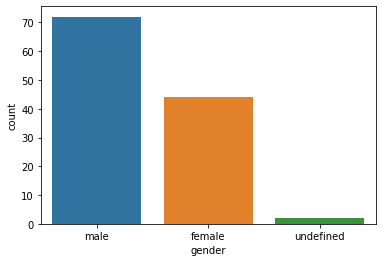

In [6]:
sns.countplot(x='gender',data=users)

We see that we have some people with undefined gender 

In [7]:
users['gender'].value_counts()

male         72
female       44
undefined     2
Name: gender, dtype: int64

In [8]:
users[users['gender']=='undefined']

,_id,name,gender,academics
67,5ea43f7310426255a7aa9b1d,Apoorva Rana,undefined,undefined
74,5ea890e410426255a7aa9c16,Gretchen,undefined,undefined


According to the search engine of GOOGLE, these names are for girls (female)

In [9]:
users['gender'].iloc[67] = 'female'

In [10]:
users['gender'].iloc[74] = 'female'

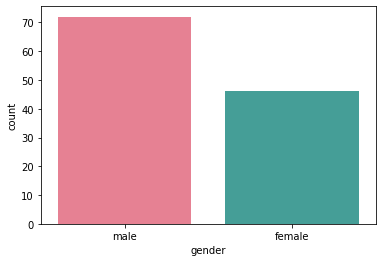

In [11]:
sns.countplot(x='gender',data=users,palette='husl')

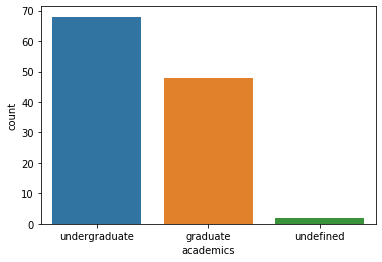

In [12]:
sns.countplot(x='academics',data=users)

Same problem here, supposing they are in the undergraduate level

In [13]:
users[users['academics']=='undefined']

,_id,name,gender,academics
67,5ea43f7310426255a7aa9b1d,Apoorva Rana,female,undefined
74,5ea890e410426255a7aa9c16,Gretchen,female,undefined


In [14]:
users['academics'].iloc[67] = 'undergraduate'

In [15]:
users['academics'].iloc[67] = 'undergraduate'

### Working on posts file

Checking for missing values

In [16]:
posts.isnull().sum()

_id            0
title          0
category      28
 post_type     0
dtype: int64

In [17]:
x = posts[posts['category'].isna()==True]
x

,_id,title,category,post_type
24,5ddeb6e80eb5e25a8a07f065,Library Managment System: Software Requirement...,NaN,project
25,5de179d80eb5e25a8a07f079,Navigation system using BFS DFS algorithms,NaN,project
29,5dee9b5042a8854bf6eabaaf,Computer Aided Machine Drawing (CAMD),NaN,project
65,5e3ea110eab55d319938a7a7,OS,NaN,project
88,5e4c3873f5561b1994c8e3d9,Bill Calculation(PHP),NaN,project
93,5e4da502f5561b1994c8e42c,Prime No.(PHP),NaN,project
94,5e4da7c8f5561b1994c8e439,Factorial of a No.(PHP),NaN,project
95,5e4dab15f5561b1994c8e446,Palindrome No.(PHP),NaN,project
96,5e4ed85af5561b1994c8e470,Factorial (.net),NaN,project
97,5e4ed8ccf5561b1994c8e47d,Leap year checking (.net),NaN,project


In [18]:
posts['category'].value_counts()

Photography                                                                                                             81
Drawings                                                                                                                47
Painting                                                                                                                20
Visual Arts                                                                                                             10
Computer Technology|Computer Application|Information Technology                                                          7
Computer Technology|Machine Learning                                                                                     7
Competition Laws                                                                                                         5
Mass Media|Indian Government                                                                                             5
Typography|Pen a

In [19]:
post_WNA = posts.dropna()
post_WNA.index = np.arange(0,post_WNA.shape[0])

categories=[]
for i in range(0,post_WNA.shape[0]):
    temp=post_WNA['category'][i].split('|')
    for j in range(0,len(temp)):
        categories.append(temp[j])
    temp=[]
    
categories = list(dict.fromkeys(categories))

In [20]:
categories

['Plant Biotechnology',
 'Artificial Intelligence',
 'Machine Learning',
 'Information Technology',
 'Operating Systems',
 'Drawings',
 'Competition Laws',
 'Eco System',
 'Economic Policies',
 'Graphic',
 'Graphic Design',
 'Painting',
 'Pen and ink',
 'Computer Technology',
 'Visual Arts',
 'Illustration',
 'Calligraphy',
 'Photography',
 'Empowerment',
 'Video editing',
 'Inorganic Chemistry',
 'Programming languages',
 'Conceptual',
 'HR Management',
 'Human Resources',
 'Mass Media',
 'International Relations',
 'Sculptures',
 'Artistic design',
 'Fashion Design',
 'Ceramics',
 'Craft',
 'Mathematics',
 'Linear Algebra',
 'Electronics & electrical Technology',
 'Electrical Machines',
 'Auditing',
 'Internal Audit',
 'E Commerce',
 'E Transactions',
 'Computation',
 'Internal Financial Control',
 'Taxation',
 'Custom Laws',
 'Audit Evidence',
 'GST',
 'Direct Tax',
 'Secratarial Audit',
 'Banking',
 'Banking Companies',
 'Banking Technology',
 'Audit Remark',
 'Cost Audit',
 'Statu

In [21]:
print("before cleaning",posts.shape)
x.index = np.arange(0,x.shape[0])
for i in range(0,x.shape[0]):
    temp=x['title'][i].split()
    for cat in categories:
        if cat in temp:
            x['category'][i]=cat
k=0
for i in range(0,posts.shape[0]):
    for j in range(0,x.shape[0]):
        if posts['title'][i]==x['title'][j]:
            posts['category'][i]=x['category'][j]

posts.dropna(axis=0,inplace=True)
print("after cleaning",posts.shape)

posts.index=np.arange(0,posts.shape[0])

before cleaning (493, 4)


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


after cleaning (468, 4)


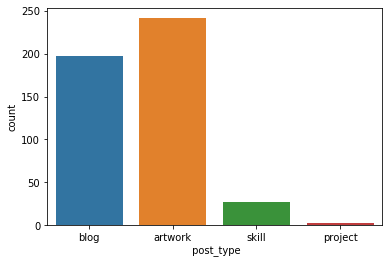

In [22]:
sns.countplot(x=' post_type',data=posts)

### Working on posts file

In [23]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 3 columns):
user_id      1449 non-null object
post_id      1449 non-null object
timestamp    1449 non-null object
dtypes: object(3)
memory usage: 34.0+ KB


In [24]:
views.describe()

,user_id,post_id,timestamp
count,1449,1449,1449
unique,118,495,1449
top,5d60098a653a331687083238,5ec1fd0974f7660d73aa0fd5,2020-05-19T10:33:34.012Z
freq,230,18,1


In [25]:
views.isnull().sum()

user_id      0
post_id      0
timestamp    0
dtype: int64

In [26]:
grp = views.groupby('user_id')
grp.count()['post_id']

user_id
5d60098a653a331687083238    230
5d610ae1653a331687083239    137
5d618359fc5fcf3bdd9a0910     23
5d6d2bb87fa40e1417a49315     28
5d7c994d5720533e15c3b1e9     95
5d90fc1a641ef364939fb6cc      1
5d9a2982979d5962253c2f81      2
5de50d768eab6401affbb135     19
5ded443342a8854bf6eaba9a      1
5deeef6142a8854bf6eabab9     69
5defd51362624b0135ea9fd2     46
5df11ee1ee4bb5252b4f5344      1
5df20f1fee4bb5252b4f5351     82
5df24eeaee4bb5252b4f5366      3
5df3f8f2ee4bb5252b4f5393     34
5df49b32cc709107827fb3c7     30
5e0d5ce12a37d20505da2a5d      2
5e1ef04c2a37d20505da2b8b     62
5e26bb482a37d20505da2c10      5
5e3563348d344822fed4d13a     26
5e35a5ed8d344822fed4d13e     21
5e365e758d344822fed4d144      2
5e37b16ceab55d319938a6f8     25
5e4195c3eab55d319938a82c      6
5e4ce251f5561b1994c8e40d      1
5e5855ced701ab08af792b51      1
5e5af599d701ab08af792b63     62
5e5b4511d701ab08af792b6d      5
5e5dfbbefbc8805f69e02c91      4
5e783375cfc8b713f5ac7c5b      2
                           ... 


In [27]:
print("The user of ID:5d60098a653a331687083238, his/her name",users[users['_id']=='5d60098a653a331687083238']['name'][0],"has the top number of posts in this site!")

The user of ID:5d60098a653a331687083238, his/her name Nivesh Singh Chauhan has the top number of posts in this site!


### Starting now with the real work!
* Now we have a good idea about the datasets
* The goal is to present for a given user the recommend posts
* Also we need to classify the posts according to their similiarities (Category)

In [28]:
for cat in categories:
    cat.lower()
    cat.capitalize()

categories = list(dict.fromkeys(categories))
categories.sort()
categories

['2D Composition',
 'Accounting',
 'Accounting Theory And Practices',
 'Acrylics',
 'Advertising',
 'Alternate Dispute Resolution',
 'Animal Biotechnology',
 'Applied Ethics',
 'Archeology',
 'Architecture',
 'Art',
 'Art; Science',
 'Articulation',
 'Artificial Intelligence',
 'Artistic design',
 'Atomic Physics',
 'Audit Evidence',
 'Audit Remark',
 'Auditing',
 'Banking',
 'Banking Companies',
 'Banking Law',
 'Banking Technology',
 'Basics of Communiaction',
 'Bio-entrepreneurship',
 'Biotechnology',
 'Break even Point',
 'Business',
 'Business Enviorment',
 'Business Management',
 'Business Organisation',
 'Business Planning',
 'Business Skills',
 'Business Strategies',
 'Calligraphy',
 'Cardiology',
 'Ceramics',
 'Child Development',
 'Cloud Computing',
 'Colonialism In India',
 'Communication',
 'Company Law',
 'Competition Laws',
 'Computation',
 'Computer Application',
 'Computer Creation',
 'Computer Technology',
 'Conceptual',
 'Corporate Accounting',
 'Corporate Social Resp

#### Recommend posts for a given user

The recommendation will be according to a score for a post:
* If the title already exists, the recommendation for this post will be first!
* The descending order of categories (4.5/10)
* The descending order of type of posts (post_type) (2.5/10)
* Similiarity of academic level (1.5/10)
* Gender of user (1.5/10)

*Note: The number of recommendation posts shown to the user may vary between users.*

In [29]:
def reco_user(id):
    """
    This function takes an id of a user and print to you the recommended posts for this user
    with matching of each post according to his information
    the function contains a simple way of coding for more understanding
    if you have any problem with it (about understanding it)
    feel free to contact me on my email a_h9@bk.ru
    """
    #Assigning essential values to a fixed variables 
    indx=users[users['_id']==id]['name'].index[0]
    name=users[users['_id']==id]['name'][indx]
    gender=users[users['_id']==id]['gender'][indx]
    academics=users[users['_id']==id]['academics'][indx]
    
    #Creating a list that contains all the ID's of posts of the user
    postsID=[]
    temp=views[views['user_id']==id]['post_id']
    temp.index=np.arange(temp.shape[0])
    for tem in temp:
        postsID.append(tem)
    
    postitles=[]
    categories=[]
    count_catgs=[]
    postype=[0,0,0,0]
    for i in range(0,len(postsID)):
        #title
        x=posts[posts['_id']==postsID[i]]
        y=str(x['title'])
        if y[0:3].isdecimal():
            y=y[7:]
        else:
            y=y[6:]
        y=y.split(';')[0]
        y=y.split('\n')[0]
        postitles.append(y)
        #category
        y=str(x['category'])
        if y[0:3].isdecimal():
            y=y[7:]
        else:
            y=y[6:]
        z=y.split('|')
        for j in range(0,len(z)-1):
            if z[j] in categories:
                count_catgs[j]+=1
            else:
                categories.append(z[j])
                count_catgs.append(1)
        #post_type='blog''artwork''skill''project'
        y=str(x[' post_type'])
        if y[0:3].isdecimal():
            y=y[7:]
        else:
            y=y[6:]
        y=y.split('\n')[0]
        if y=='blog':
            postype[0]+=1
        if y=='artwork':
            postype[1]+=1
        if y=='skill':
            postype[2]+=1
        if y=='project':
            postype[3]+=1
    #Starting with recommend posts for the user according to a score
    reco_posts=[]
    scores=[]
    # posts_WID is the same file as posts.csv but without the posts of the given user
    posts_WID=posts
    for i in range(0,len(postsID)):
        posts_WID=posts_WID.drop(posts_WID.loc[posts_WID['_id']==postsID[i]].index)

    posts_WID.index = np.arange(0,posts_WID.shape[0])
    for i in range(0,len(postitles)):
        for j in range(0,posts_WID.shape[0]):
            if postitles[i] == posts_WID['title'][j]:
                reco_posts.append(posts_WID['_id'][j])
                scores.append(10)

    for post in reco_posts:
        posts_WID=posts_WID.drop(posts_WID.loc[posts_WID['_id']==post].index)
        posts_WID.index = np.arange(0,posts_WID.shape[0])

    if len(categories)>=20:
        cetegories=categories[:20]
        count_catgs=count_catgs[:20]
    else:
        cetegories=categories[:10]
        count_catgs=count_catgs[:10]
    for i in range(0,len(categories)):
        for j in range(0,posts_WID.shape[0]):
            if categories[i]==posts_WID['category'][j]:
                reco_posts.append(posts_WID['_id'][j])
                scores.append(4.5)
                index0=views[views['post_id']==posts_WID['_id'][j]]['user_id'].index[0]
                userid=views[views['post_id']==posts_WID['_id'][j]]['user_id'][index0]
                index1=users[users['_id']==userid].index[0]
                if users[users['_id']==userid]['gender'][index1]==gender:
                    scores[len(scores)-1]+=1.5
                ptype=['blog','artwork','skill','project']
                for p in ptype:
                    if posts[' post_type'][j]==p:
                        a=ptype.index(p)
                        if postype[a]==np.max(postype):
                            scores[len(scores)-1]+=2.5
                if users[users['_id']==userid]['academics'][index1]==academics:
                    scores[len(scores)-1]+=1.5
                
    print("Dear User ",name,", we recommend to you the follwing posts with matching of each posts according to your information:")
    for i in range(0,len(reco_posts)):
        print("Post #",i+1)
        idx=posts[posts['_id']==reco_posts[i]].index[0]
        print("TITLE:",posts[posts['_id']==reco_posts[i]]['title'][idx])
        print("CATEGORY:", posts[posts['_id']==reco_posts[i]]['category'][idx])
        print("POST TYPE:", posts[posts['_id']==reco_posts[i]][' post_type'][idx])
        print(scores[i]*10,"% match\n")
        

reco_user('5d60098a653a331687083238') 

Dear User  Nivesh Singh Chauhan , we recommend to you the follwing posts with matching of each posts according to your information:
Post # 1
TITLE: PENCIL RENDERING
CATEGORY: Drawings
POST TYPE: artwork
100 % match

Post # 2
TITLE: PENCIL RENDERING
CATEGORY: Drawings
POST TYPE: artwork
100 % match

Post # 3
TITLE: MOSAIC ART
CATEGORY: Visual Arts|Craft|Mixed Media|Conceptual|Mosaic painting
POST TYPE: artwork
100 % match

Post # 4
TITLE: Aesthetic.
CATEGORY: Photography
POST TYPE: artwork
100 % match

Post # 5
TITLE: Aesthetics
CATEGORY: Photography|Visual Arts
POST TYPE: artwork
100 % match

Post # 6
TITLE: Concept of Revenue
CATEGORY: Economics|Revenue Concept
POST TYPE: blog
100 % match

Post # 7
TITLE: Must-Visit Hill Stations in Maharashtra
CATEGORY: Geography|Indian Geography
POST TYPE: blog
100 % match

Post # 8
TITLE: TIE AND DYE
CATEGORY: Fashion Design
POST TYPE: artwork
75.0 % match

Post # 9
TITLE: Lord Shiva
CATEGORY: Drawings
POST TYPE: artwork
75.0 % match

Post # 10
TIT

#### Recommend posts for a given post

The recommendation will be according to a score for a post:
* If the title is same, the recommendation for this post will be first!
* The descending order of categories (5/10)
* The descending order of type of posts (post_type) (3/10)
* If we have more than one category and two or more categories are commun (2/10)

*Note: The number of recommendation posts shown may vary between posts.*

In [30]:
def reco_post(id):
    """
    This function takes an id of a post as parameter and try to find the similiar posts
    the critirea of finding similiarity is by find commun informations like post type and categories
    Also the similiarity may be because the user everytime posts about the same idea.
    The function will returns a couple of posts with a percentage of matching.
    For any question you can text me.
    """
    index=posts[posts['_id']==id]['title'].index[0]
    title=posts[posts['_id']==id]['title'][index]
    category=posts[posts['_id']==id]['category'][index]
    post_type=posts[posts['_id']==id][' post_type'][index]
    mycatgs=category.split('|')
    l=len(mycatgs)
    reco_posts=[]
    scores=[]
    itt=0
    for i in range(0,posts.shape[0]):
        itt=0
        it=0
        if id!=posts['_id'][i]:
            if posts['title'][i]==title:
                reco_posts.append(posts['_id'][i])
                scores.append(10)
                itt+=1
            if itt==0:
                cat=posts['category'][i].split('|')
                x=0
                for c in cat:
                    if c in mycatgs:
                        x+=1
                if x >= l*0.25:
                    reco_posts.append(posts['_id'][i])
                    scores.append((x+2)*5/l)
                    it+=1
                if it==0:
                    if posts[' post_type'][i]==post_type:
                        reco_posts.append(posts['_id'][i])
                        scores.append(3)
                if it!=0:
                    if posts[' post_type'][i]==post_type:
                        scores[len(reco_posts)-1]+=3
    for s in scores:
        if s<4:
            scores[scores.index(s)]+=1
            
    print("We recommend to you these posts that are similiar to the given post\n")
    for rec in reco_posts:
        index=posts[posts['_id']==rec].index[0]
        print("TITLE:", posts[posts['_id']==rec]['title'][index])
        print("ID:", rec)
        print(scores[reco_posts.index(rec)]*10,"% match \n")
    

reco_post('5d6d39567fa40e1417a4931c')

We recommend to you these posts that are similiar to the given post

TITLE: hello there
ID: 5d62abaa65218653a132c956
40 % match 

TITLE: What is an Operating System ?
ID: 5d7d23315720533e15c3b1ee
40 % match 

TITLE: How Competition law evolved?
ID: 5d80dfbc6c53455f896e600e
40 % match 

TITLE: Raghavan Committee - 2002.
ID: 5d80e7c16c53455f896e6014
40 % match 

TITLE: Let's discuss some Case laws!
ID: 5d80ecfd6c53455f896e601a
40 % match 

TITLE: Forms of Cartel.
ID: 5d81323a6c53455f896e6044
40 % match 

TITLE: Biodiversity
ID: 5d9b3514979d5962253c2f90
40 % match 

TITLE: Economic policy
ID: 5d9b950768671220a1b2b153
40 % match 

TITLE: MIS
ID: 5dadf6ae610ba040fbfdf5c8
80.0 % match 

TITLE: CLASSIFYING FORMS OF CARTELS
ID: 5db2b91a99cbb90e4339c749
40 % match 

TITLE: Marital Rape - Rape is Rape
ID: 5dd1751db802e41ed198b680
40 % match 

TITLE: The Periodic Table
ID: 5dea816a42a8854bf6eaba89
40 % match 

TITLE: Python 3 Programming Introduction
ID: 5e04fb252a37d20505da2a2b
40 % match 

TITL

## End of project!